#### Leafmap

In [28]:
import leafmap
m = leafmap.Map()
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

#### Rasterio

Importing and reading the the image

In [29]:
import rasterio

image = rasterio.open('/home/bharathraj/Documents/geospatial_ml/PV01_Rooftop_Brick/PV01_324942_1203839.bmp')

In [30]:
image.name

'/home/bharathraj/Documents/geospatial_ml/PV01_Rooftop_Brick/PV01_324942_1203839.bmp'

In [31]:
image.mode

'r'

No. of bands:

In [32]:
image.count

3

Image size:

In [33]:
image.width, image.height

(256, 256)

Reading the raster data

In [34]:
band = image.read(1)
band

array([[129, 127, 129, ...,  58,  54,  57],
       [127, 123, 123, ...,  61,  62,  61],
       [132, 131, 130, ...,  63,  63,  61],
       ...,
       [156, 163, 163, ...,  52,  60,  66],
       [162, 158, 163, ...,  56,  71,  69],
       [163, 150, 161, ...,  64,  74,  76]], dtype=uint8)

Plotting the raster data

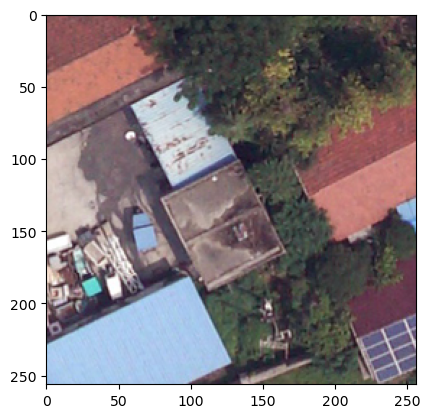

<AxesSubplot: >

In [35]:
from rasterio.plot import show
show(image.read(), transform=image.transform)

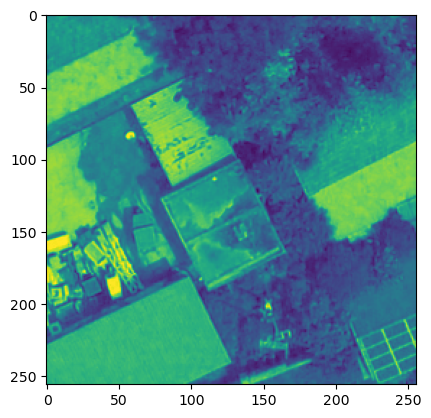

<AxesSubplot: >

In [36]:
show(band)

### Exploring Sample Data from chosen Dataset

The dataset chosen: https://zenodo.org/record/5171712.

A photovoltaic (PV) dataset from satellite and aerial imagery. The dataset includes three groups of PV samples collected at the spatial resolution of 0.8m, 0.3m and 0.1m, namely PV08 from Gaofen-2 and Beijing-2 imagery, PV03 from aerial photography, and PV01 from UAV orthophotos. PV08 contains rooftop and ground PV samples. Ground samples in PV03 are divided into five categories according to their background land use type: shrub land, grassland, cropland, saline-alkali, and water surface. Rooftop samples in PV01 are divided into three categories according to their background roof type: flat concrete, steel tile, and brick. Data document can refer to the preprint https://essd.copernicus.org/preprints/essd-2021-270/

In [4]:
import os
import numpy

In [16]:
brick = "PV01_Rooftop_Brick"
flatConcrete = "PV01_Rooftop_FlatConcrete"
steelTile = "PV01_Rooftop_SteelTile"

brick_paths = []
flatConcrete_paths = []
steelTile_paths = []

for root, dirs, files in os.walk(brick):
    for file in files:
        brick_paths.append(os.path.join(root, file))

for root, dirs, files in os.walk(flatConcrete):
    for file in files:
        flatConcrete_paths.append(os.path.join(root, file))

for root, dirs, files in os.walk(steelTile):
    for file in files:
        steelTile_paths.append(os.path.join(root, file))


In [17]:
brick_paths[:10]

['PV01_Rooftop_Brick/PV01_325472_1204667_label.bmp',
 'PV01_Rooftop_Brick/PV01_325122_1203848_label.bmp',
 'PV01_Rooftop_Brick/PV01_325122_1203842.bmp',
 'PV01_Rooftop_Brick/PV01_325122_1203834.bmp',
 'PV01_Rooftop_Brick/PV01_325360_1203794_label.bmp',
 'PV01_Rooftop_Brick/PV01_325426_1204675.bmp',
 'PV01_Rooftop_Brick/PV01_324972_1203798.bmp',
 'PV01_Rooftop_Brick/PV01_325565_1203822.bmp',
 'PV01_Rooftop_Brick/PV01_325496_1203757_label.bmp',
 'PV01_Rooftop_Brick/PV01_325599_1204545_label.bmp']

In [18]:
## ordering the paths

brick_paths.sort()
flatConcrete_paths.sort()
steelTile_paths.sort()


In [19]:
brick_paths[:10]

['PV01_Rooftop_Brick/PV01_324942_1203839.bmp',
 'PV01_Rooftop_Brick/PV01_324942_1203839_label.bmp',
 'PV01_Rooftop_Brick/PV01_324942_1203842.bmp',
 'PV01_Rooftop_Brick/PV01_324942_1203842_label.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203793.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203793_label.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203795.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203795_label.bmp',
 'PV01_Rooftop_Brick/PV01_324956_1203801.bmp',
 'PV01_Rooftop_Brick/PV01_324956_1203801_label.bmp']

In [24]:
brick_img, brick_label = [brick_paths[i] for i in range(0,len(brick_paths),2)], [brick_paths[i] for i in range(1,len(brick_paths),2)]
flatConcrete_img, flatConcrete_label = [flatConcrete_paths[i] for i in range(0,len(flatConcrete_paths),2)], [flatConcrete_paths[i] for i in range(1,len(flatConcrete_paths),2)]
steelTile_img, steelTile_label = [steelTile_paths[i] for i in range(0,len(steelTile_paths),2)], [steelTile_paths[i] for i in range(1,len(steelTile_paths),2)]

In [22]:
brick_img[:10]

['PV01_Rooftop_Brick/PV01_324942_1203839.bmp',
 'PV01_Rooftop_Brick/PV01_324942_1203842.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203793.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203795.bmp',
 'PV01_Rooftop_Brick/PV01_324956_1203801.bmp',
 'PV01_Rooftop_Brick/PV01_324956_1203803.bmp',
 'PV01_Rooftop_Brick/PV01_324958_1203801.bmp',
 'PV01_Rooftop_Brick/PV01_324958_1203803.bmp',
 'PV01_Rooftop_Brick/PV01_324972_1203798.bmp',
 'PV01_Rooftop_Brick/PV01_324972_1203801.bmp']

In [23]:
brick_label[:10]

['PV01_Rooftop_Brick/PV01_324942_1203839_label.bmp',
 'PV01_Rooftop_Brick/PV01_324942_1203842_label.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203793_label.bmp',
 'PV01_Rooftop_Brick/PV01_324951_1203795_label.bmp',
 'PV01_Rooftop_Brick/PV01_324956_1203801_label.bmp',
 'PV01_Rooftop_Brick/PV01_324956_1203803_label.bmp',
 'PV01_Rooftop_Brick/PV01_324958_1203801_label.bmp',
 'PV01_Rooftop_Brick/PV01_324958_1203803_label.bmp',
 'PV01_Rooftop_Brick/PV01_324972_1203798_label.bmp',
 'PV01_Rooftop_Brick/PV01_324972_1203801_label.bmp']

### Visualizing the data

In [25]:
import matplotlib.pyplot as plt

In [26]:
def display(image, mask):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[1].imshow(mask)
    plt.show()

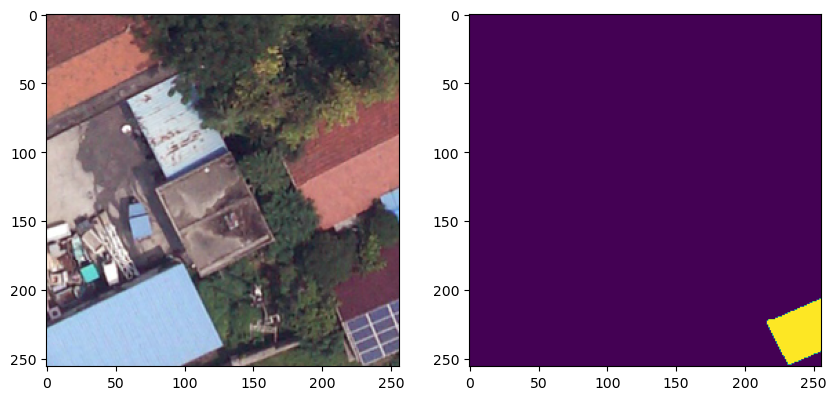

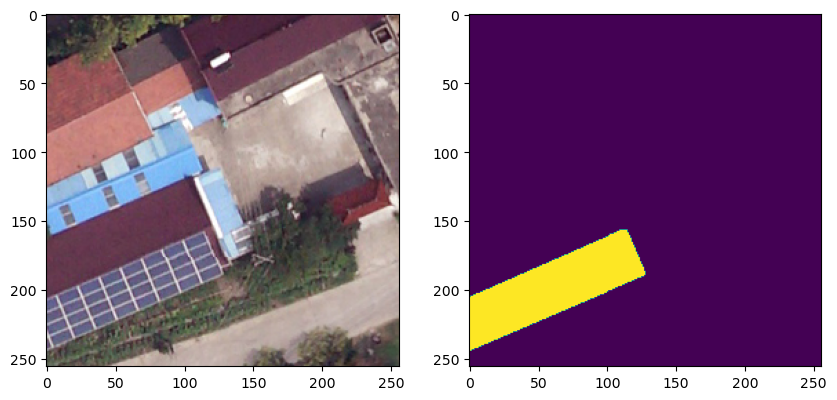

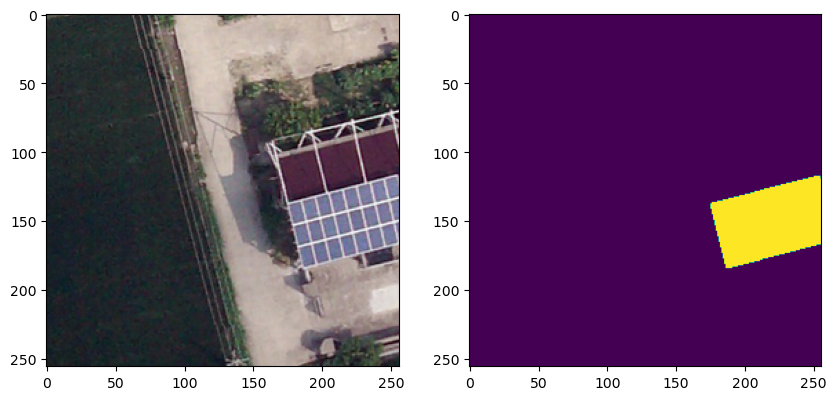

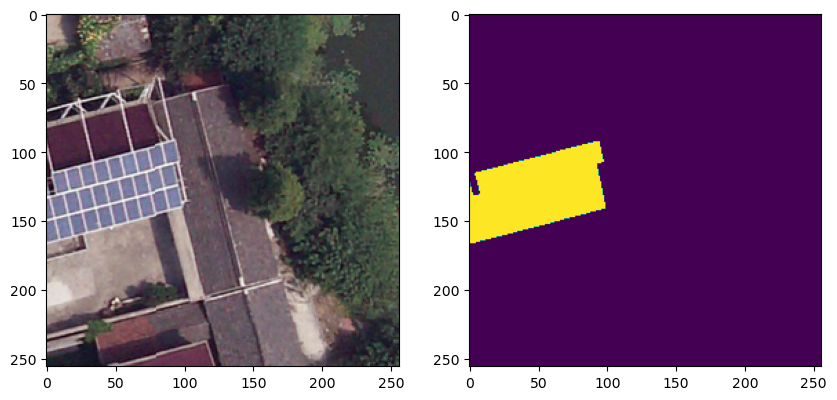

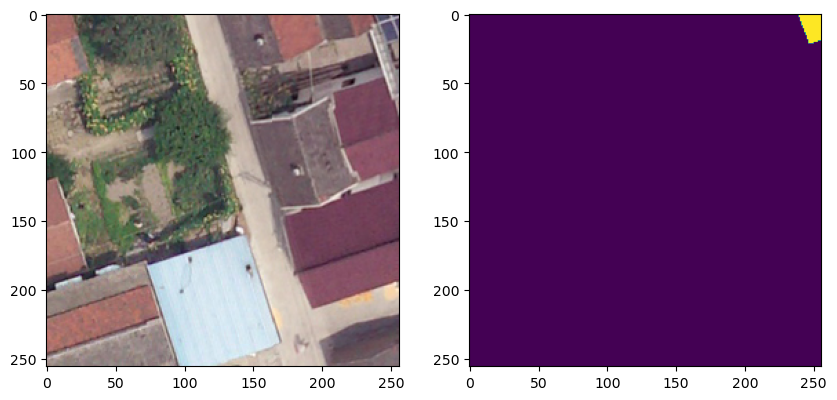

In [51]:
for i in range(5):    
    image = rasterio.open(brick_img[i])
    mask = rasterio.open(brick_label[i])
    image = image.read()
    mask = mask.read()
    image = numpy.moveaxis(image, 0, -1)
    mask = numpy.moveaxis(mask, 0, -1)
    display(image, mask)